In [2]:
import pickle 
import numpy as np 
from ecog_utils import erp_util
import matplotlib.pyplot as plt
from scipy.stats import zscore
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8})#, 'font.sans-serif': 'Arial'})
plt.rcParams.update({'font.sans-serif':'Arial'})
import matplotlib as mpl
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
plt.rcParams['svg.fonttype'] = 'none'
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
source_path = './source_data/ED_7/'

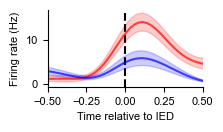

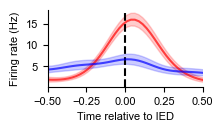

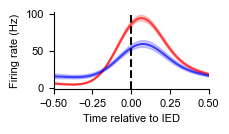

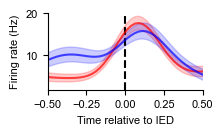

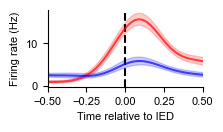

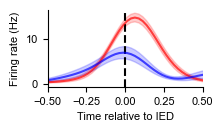

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem
import os
files = os.listdir(f'{source_path}')
for i,f in enumerate(files):
    d = np.load(f'{source_path}/{f}')
    means = d['means_']
    sems = d['sems_']
    np.savetxt(f'./statistical_source/ED7/neuron_means_raster_{i}.txt', means)
    np.savetxt(f'./statistical_source/ED7/neuron_sems_raster_{i}.txt', sems)
    fig,ax = plt.subplots(figsize=(2,1))
    plt.axvline(0,color='k',linestyle='--')
    cols = ['r','b']
    labs = ['Top Amp','Bottom Amp']
    for m,s,c in zip(means,sems,cols[:2]):
        t = np.linspace(-1,1,m.shape[0])
        ax.plot(t,m,color=c,alpha=0.7)
        ax.fill_between(t,m + s,m - s,color=c,alpha=0.2,label='_hidden')
    ax.set(ylabel='Firing rate (Hz)',xlabel='Time relative to IED',xlim=[-0.5,0.5])#,ylim=[0,20],yticks=[0,5,10,15])
